Load Cancer Dataset

In [31]:
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn.datasets import load_breast_cancer

cancer_ds = load_breast_cancer()

print("cancer.keys(): \n{}".format(cancer_ds.keys()))
print("Sample counts per class:\n{}".format({n: v for n, v in zip(cancer_ds.target_names, np.bincount(cancer_ds.target))}))

# Información del Dataset
cancer_ds.DESCR
cancer_ds.feature_names


cancer.keys(): 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
Sample counts per class:
{'malignant': 212, 'benign': 357}


array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [32]:
print(len(cancer_ds.feature_names))
print(cancer_ds.filename)


30
breast_cancer.csv


Data Preprocessing
Let's remove unnecessary columns from the dataset.

In [33]:
#Espacio para preprocesamiento del dataset: eliminación de outliers, elimación datos faltantes,....

Particionar Data Set

In [34]:
from sklearn.model_selection import train_test_split
print(type(cancer_ds['data']),type(cancer_ds['target']),sep="----")
print(cancer_ds['data'].shape,cancer_ds['target'].shape,sep="----")
X_train, X_test, y_train, y_test = train_test_split(cancer_ds['data'], cancer_ds['target'],
                  train_size=0.7, test_size=0.3, random_state=0, stratify=cancer_ds['target'], shuffle=True)
                  # El parámetro stratify asegura la partición balanceada

print("X_train shape: {}".format(X_train.shape))  
print("y_test :", y_train)

# X es una matriz, y es un vector
print("y_train shape: {}".format(y_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

<class 'numpy.ndarray'>----<class 'numpy.ndarray'>
(569, 30)----(569,)
X_train shape: (398, 30)
y_test : [1 1 0 1 0 1 0 1 1 1 1 1 1 1 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 0 1 1 0 1 1 0 0
 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 0 1 1 1 1 1 0 0 1 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 1 0 1 0 0 1 1 1 0 0 0 1 1
 1 0 1 0 1 1 0 1 1 0 0 0 0 1 0 1 1 1 1 1 1 1 0 0 1 0 1 0 1 1 1 0 0 0 1 0 0
 1 1 1 0 1 1 0 0 1 1 0 1 1 0 0 0 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1
 0 1 1 1 0 0 0 0 0 0 1 0 1 1 1 0 1 1 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 1 1 1 1
 1 0 1 1 0 0 1 1 0 0 0 0 1 1 1 1 0 1 0 0 1 1 1 0 1 0 0 1 1 1 1 1 0 1 1 1 1
 0 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 0 1 0 0 0 0 1 1 1 1 1 1 0 0
 1 0 0 1 0 1 0 0 1 1 1 0 1 0 0 1 1 1 0 0 0 0 0 1 0 0 1 1 1 1 0 0 1 0 0 1 0
 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 0 1 0 0 1 1 1 0 1 1 0
 1 1 1 1 1 0 0 1 1 1 0 1 0 1 1 1 0 0 1 0 1 1 1 0 1 1 1 1]
y_train shape: (398,)
X_test shape: (171, 30)
y_test shape: (171,)


Building the KNN Classifier

In [35]:
from sklearn.neighbors import KNeighborsClassifier

knnmod = KNeighborsClassifier(n_neighbors=8)

knnmod.fit(X_train, y_train)


#Predicting the model on training and test sets.
y_train_pred_kn = knnmod.predict(X_train)
y_test_pred_kn = knnmod.predict(X_test)

#Performance of the model with the accuracy score function

from sklearn.metrics import accuracy_score
knnmod_train = accuracy_score(y_train, y_train_pred_kn)
knnmod_test = accuracy_score(y_test, y_test_pred_kn)

print(f"KNN train / test accuracies: {knnmod_train: .3f} / {knnmod_test: .3f}")


KNN train / test accuracies:  0.945 /  0.924


Confusion Matrix 

Test Data Set : KNN Classifier

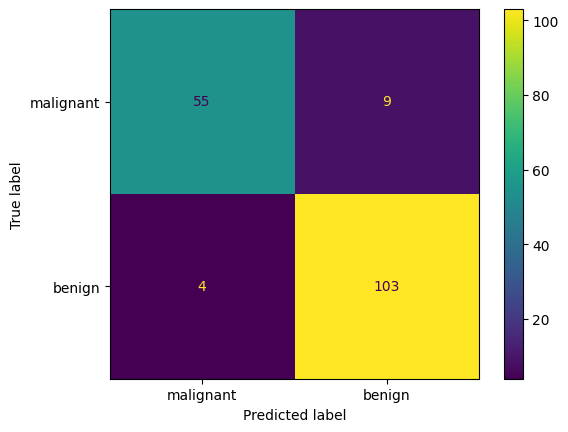

Text(0.5, 1.0, 'Confusion Matrix:  Test - KNN')

In [36]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_test_pred_kn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=cancer_ds.target_names)
disp.plot()
plt.show()
disp.ax_.set_title('Confusion Matrix:  Test - KNN')

---
Building the Bagging Model

In [37]:
from sklearn.ensemble import BaggingClassifier

bag = BaggingClassifier(estimator=knnmod, n_jobs=-1, n_estimators=1000, random_state=0,warm_start=True) 

print(bag.get_params(deep=True))

bag = bag.fit(X_train[:199], y_train[:199])


#Predicting the model on training and test sets.

y_train_pred_bg = bag.predict(X_train)
y_test_pred_bg = bag.predict(X_test)

#Performance of the model with the accuracy score function

bag_train = accuracy_score(y_train, y_train_pred_bg)
bag_test = accuracy_score(y_test, y_test_pred_bg)
print(f"Bagging train/test accuracies: {bag_train: .3f}/{bag_test: .3f}")
bag.n_estimators += 1000
bag = bag.fit(X_train[200:], y_train[200:])
y_train_pred_bg = bag.predict(X_train)
y_test_pred_bg = bag.predict(X_test)

#Performance of the model with the accuracy score function

bag_train = accuracy_score(y_train, y_train_pred_bg)
bag_test = accuracy_score(y_test, y_test_pred_bg)
print(f"Bagging train/test accuracies: {bag_train: .3f}/{bag_test: .3f}")



{'base_estimator': 'deprecated', 'bootstrap': True, 'bootstrap_features': False, 'estimator__algorithm': 'auto', 'estimator__leaf_size': 30, 'estimator__metric': 'minkowski', 'estimator__metric_params': None, 'estimator__n_jobs': None, 'estimator__n_neighbors': 8, 'estimator__p': 2, 'estimator__weights': 'uniform', 'estimator': KNeighborsClassifier(n_neighbors=8), 'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 1000, 'n_jobs': -1, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': True}
Bagging train/test accuracies:  0.935/ 0.918
Bagging train/test accuracies:  0.940/ 0.918


Confusion Matrix 

Test Data Set : Bagging

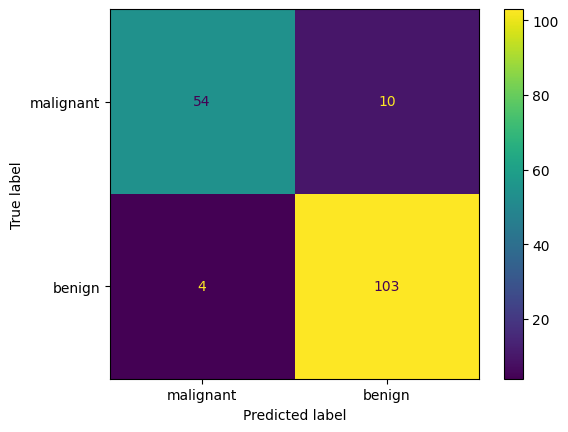

Text(0.5, 1.0, 'Confusion Matrix:  Test - Bagging')

In [38]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_test_pred_bg)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=cancer_ds.target_names)
disp.plot()
plt.show()
disp.ax_.set_title('Confusion Matrix:  Test - Bagging')

In [39]:
from sklearn.svm import SVC

supvm = SVC(random_state=0)
supvm.fit(X_train, y_train)
SVC(random_state=0)

#Predicting the model on training and test sets.

y_train_pred_sv = supvm.predict(X_train)
y_test_pred_sv = supvm.predict(X_test)

#Performance of the model with the accuracy score function

from sklearn.metrics import accuracy_score
supvm_train = accuracy_score(y_train, y_train_pred_sv)
supvm_test = accuracy_score(y_test, y_test_pred_sv)

print(f"Decision SVM train / test accuracies: {supvm_train: .3f} / {supvm_test: .3f}")

Decision SVM train / test accuracies:  0.922 /  0.906


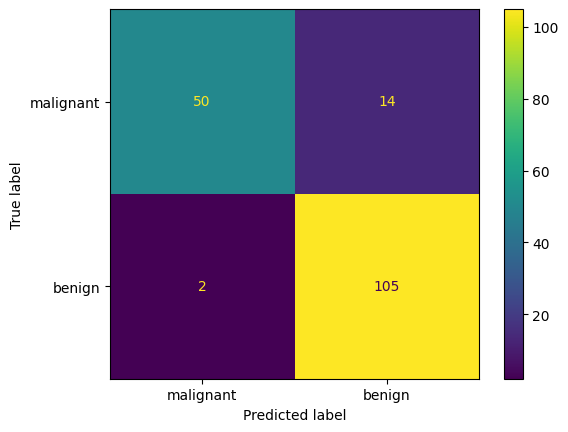

Text(0.5, 1.0, 'Confusion Matrix:  Test - SVM')

In [40]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_test_pred_sv)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=cancer_ds.target_names)
disp.plot()
plt.show()
disp.ax_.set_title('Confusion Matrix:  Test - SVM')

In [41]:
bag = BaggingClassifier(estimator=supvm ,n_estimators=100, random_state=0,warm_start=True)
print(bag.get_params(deep=True))


# print(bag.decision_function(X_train).shape)

bag = bag.fit(X_train[200:], y_train[200:])
# print(bag.decision_function(X_train).shape)

#Predicting the model on training and test sets.

y_train_pred_bg = bag.predict(X_train[200:])
y_test_pred_bg = bag.predict(X_test)

#Performance of the model with the accuracy score function

bag_train = accuracy_score(y_train[200:], y_train_pred_bg)
bag_test = accuracy_score(y_test, y_test_pred_bg)
print(f"Bagging train/test accuracies: {bag_train: .3f}/{bag_test: .3f}")

{'base_estimator': 'deprecated', 'bootstrap': True, 'bootstrap_features': False, 'estimator__C': 1.0, 'estimator__break_ties': False, 'estimator__cache_size': 200, 'estimator__class_weight': None, 'estimator__coef0': 0.0, 'estimator__decision_function_shape': 'ovr', 'estimator__degree': 3, 'estimator__gamma': 'scale', 'estimator__kernel': 'rbf', 'estimator__max_iter': -1, 'estimator__probability': False, 'estimator__random_state': 0, 'estimator__shrinking': True, 'estimator__tol': 0.001, 'estimator__verbose': False, 'estimator': SVC(random_state=0), 'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': True}
Bagging train/test accuracies:  0.924/ 0.901


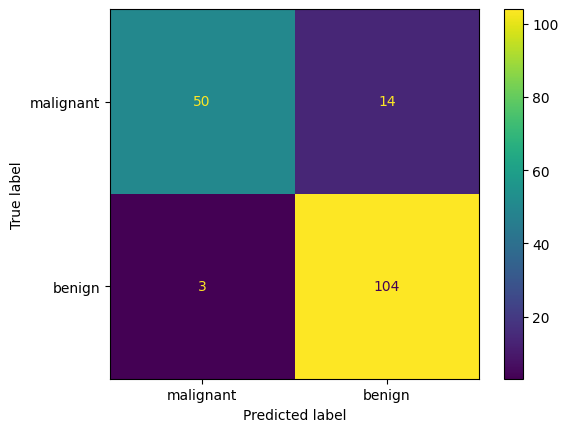

Text(0.5, 1.0, 'Confusion Matrix:  Test - Bagging')

In [42]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_test_pred_bg)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=cancer_ds.target_names)
disp.plot()
plt.show()
disp.ax_.set_title('Confusion Matrix:  Test - Bagging')

In [43]:
yyyy=cancer_ds.target_names
yyy=np.array(['mali','benign']).flatten()
